# An Analysis on K-Pop Spotify Data

## Summary of Findings

### Dataset Introduction

This dataset consists of Spotify track data taken from various artists under the K-Pop genre, which includes information such as how long a track is, its popularity value, and its [audio features](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). With the immense amount of attention K-Pop as a genre is gaining as of recent in the West as seen with artists like BTS and Blackpink, this analysis might be helpful in identifying the possible preferences and biases of these listeners. In the first part of my analysis, I will conduct a hypothesis test that will answer the following: Is the popularity value of a track affected by the gender of the artist? Then, the second part will focus on my process on building a model designed to predict the popularity value of a track. For the first part of my investigation, I will be mainly focusing on the popularity and gender columns below.

### Cleaning and EDA

First off, the original dataset did not include the gender of the artists recorded as Spotify does not record that data. So, I created a function that would assign a gender to the artists, which categorized them based on lists that I created manually using prior knowledge and some Google searches. I extracted the artists and popularity values, putting them into a separate dataframe and applied the function onto the artists column to get their genders. Since I'm only looking at male and female artists, I dropped any artists that were assigned as 'co-ed' when conducting the hypothesis test. There were no missing values in any of the columns, so I did not have to apply imputation on them. 

**Univariate Anaylsis:**
For this part, I calcuated the mean, min, max, and standard deviation of the popularity column. The popularity mean being 48.23 suggests that most K-Pop tracks have average scores in popularity, as popularity is measured on a scale of 0-100. I also plotted the distribution of the popularity column, which appears to have a normal distribution. The value counts on the gender column shows that there are more tracks by male artists versus female artists, which might possibly result in more bias towards males because there is more data. 

**Bivariate Anaylsis:**
Upon plotting the distributions of popularity values for male and female groups respectively, we can see that both distributions appear to be similar and normal in both the histogram and box plot. However, there seems to be more outliers that represent low popularity values for male artists versus female, which can possibly skew the data. 

**Interesting Aggregates:**
For this part, I grouped the dataset by year and got the mean, standard deviation, min, and max of each group. Female artists have the highest mean, std, and max popularity value (48.8, 13.4, 89) while male artists have the lowest min (0). Co-Ed artists have the lowest mean and std values of 44.45 and 12.88 respectively, which makes sense since they have the least amount of tracks in the dataset. Even though female artists have the highest mean and std, the popularity mean and std values of male and female artists are similar to each other.

Because my dataset contains no missing values at all, I will not be conducting an assessment of missingness. Therefore, we will now go over the hypothesis test in the next section.

### Hypothesis Test
- **Question:** Does gender affect the popularity value of a certain track? 
- **Null Hypothesis:** The popularity values among male and female artists/groups have the same distribution. 
- **Alternative Hypothesis:** The distribution of popularity values among male artists/groups differs than those of female artists/groups.

To test my hypothesis, I conducted a permutation test using the absolute differences in means as my test statistic. This test statistic can easily tell us whether the distributions are similar or not. So if both distributions were the same, then their absolute difference would end up being 0. The significance level I will be using for this hypothesis test is 0.01. Our p-value was 0.2027, which means that we would fail to reject the null hypothesis. This means that we cannot say that the distribution of popularity values among male and female artists differ from each other. The data supports the null hypothesis, so both distributions are the same/similar to each other. 

It is important to note that there is the possibility that if I had more data, possibly more data from female artists, then the results of the hypothesis test might change and give us a clearer conclusion. Perhaps I could improve on this by taking artists from other playlists other than the playlists that Spotify puts under the K-Pop genre category. 

### Model Introduction
The following section details the process of how I built a model designed to predict the popularity value of a K-Pop track. This model is based on a regression problem as the value I'm predicting is quantitative. For my baseline model, I used 4 features utilizing the columns Artists, Duration_ms, Danceability, and Gender as they were some of the most basic features that would define a track without getting too detailed into the audio features of the track itself. Then for my final model, I used the previous features of my baseline model and added three new ones using some of the audio features: Energy, Valance, and Tempo. Considering how the baseline model only utilized one audio feature, I added more audio features in hopes of making it more detailed or specific to the track itself. The evaluation metric that I used for both models is the score or R^2 value of the model. 

### Baseline Model

For the baseline model, I only used 4 features (Artists, Duration_ms, Danceability, and Gender) at first. The columns Artists and Gender are both nominal,  while Duration_ms and Danceability are quantitative. I applied One-Hot Encoding to these columns and for my regressor, I used Linear Regression. After running the model a couple times, the model gave an average score/R^2 value of about 0.58 and a RMSE mean of 8.59. Because the average score is not that low, this suggests that this model somewhat fits to the data. Also, the low mean RMSE demonstrates that the model has low error. In conclusion, this baseline model is not that bad, but it could use some improvements to make it more accurate. 

### Final Model

In developing my final model, I decided to add three additional features using the following columns: Energy, Valance, and Tempo. Then, I created and tested 3 different models with different transformers being applied to the added columns to construct the features. 

- **Model 1: Binarizer w/ Basic Threshold -** For model 1, I applied the binarizer transformer on columns Danceability, Energy, and Valence, setting the threshold at 0.5 since these columns' values range from 0.0 to 1 to indicate how prevalent that specific audio feature is in the track. This feature was designed to categorize tracks on whether they have high danceability/energy/valence or not on a basic level. Therefore, the popularity value could be predicted based on this knowledge of whether the track has more of a certain value  or not.  

- **Model 2: Binarizer w/ Specified Thresholds -** Instead of setting the threshold at 0.5, I set the thresholds as the means of the Danceability, Energy, and Valance columns respectively. By setting the thresholds to the means, it would make the model fit more to the data, which can be beneficial to this model as the audio feature means of K-Pop tracks might differ significantly compared to other genres. 

- **Model 3: Function Transformer + Binarizer -** For this model, I used a Function Transformer on the Duration_ms column to categorize tracks that have either a short, average, or long duration. Considering that tracks with certain durations might be more popular than others, this was the main reason I constructed this feature. I also used the previous model's binarizer transformers for this model as well. 

Upon conducting a train-test split of 90% training and 10% test data on all three models, Model 3 gave the best results with a score of 0.669 versus Model 1's score of 0.664 and Model 2's score of 0.667. After selecting Model 3 as my final model, I had to figure out which were the best parameters for the model's regressor. After conducting a GridSearchCV, it was best to set the parameters fit_intercept to False, n_jobs to 5, and normalize to False. In the end, my final model gave an RMSE mean of 7.44 and a score mean of 0.684, which shows improvement from my baseline model. 

### Fairness Evaluation

In order to evaluate the fairness of my final model, I conducted a permutation test on a subset of the original data. The subset was created from the Gender column, separating the data on whether the artist(s) were male or female. With this subset, the test will evaluate whether the model performs better on data of tracks made by primarily male or female artists. Since my final model uses regression, I used the score to evaluate its fairness. Our null hypothesis is that the model is fair as the score is similar for both datasets, while the alternative hypothesis is that the model is unfair as the score is different for both datasets. The test statistic I used is the absolute difference between the scores. After conducting the permutation test, it gave us a p-value of 0.1, which at a significance level of 0.05 means that we would fail to reject the null hypothesis. This means that for this particular subset, the model is deemed fair and the scores of both subsets are similar. Although the permutation test suggests that my final model is fair, there is still a possibility that the model could still have some bias and thus would give different results if used on a completely different dataset or if I had more data. 

## Code

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Higher resolution figures

In [2]:
# reading in the dataset
fp = os.path.join('kpop_data.csv')
df = pd.read_csv(fp)

### Cleaning and EDA

In [3]:
df.head(5)

,album,artists,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms.1,time_signature
0,"{'album_type': 'album', 'artists': [{'external...",EXO-SC,1,209253,False,{'isrc': 'KRA302000363'},{'spotify': 'https://open.spotify.com/track/4g...,https://api.spotify.com/v1/tracks/4gGZc6MMYavM...,4gGZc6MMYavM5KFS2zwOVL,False,...,-2.837,0,0.0364,0.3620,0.000000,0.0997,0.612,111.928,209253,4
1,"{'album_type': 'album', 'artists': [{'external...",EXO-SC,1,195613,False,{'isrc': 'KRA302000366'},{'spotify': 'https://open.spotify.com/track/6k...,https://api.spotify.com/v1/tracks/6ksOaijLwaSW...,6ksOaijLwaSWTVRtPgakt0,False,...,-2.927,0,0.0487,0.2320,0.000000,0.2040,0.772,89.970,195613,4
2,"{'album_type': 'single', 'artists': [{'externa...",EXO-SC,1,203866,False,{'isrc': 'KRA301900282'},{'spotify': 'https://open.spotify.com/track/3T...,https://api.spotify.com/v1/tracks/3TfLZodlQ1Tz...,3TfLZodlQ1TzNpdrc4KXR5,False,...,-3.811,0,0.1250,0.3010,0.000000,0.1430,0.847,135.029,203867,4
3,"{'album_type': 'album', 'artists': [{'external...",EXO-SC,1,174720,False,{'isrc': 'KRA302000370'},{'spotify': 'https://open.spotify.com/track/7z...,https://api.spotify.com/v1/tracks/7zgAysZmfnHK...,7zgAysZmfnHKhayf30Dx2U,False,...,-2.735,0,0.2290,0.0421,0.000002,0.2210,0.691,97.048,174720,4
4,"{'album_type': 'album', 'artists': [{'external...",EXO-SC,1,206293,False,{'isrc': 'KRA302000369'},{'spotify': 'https://open.spotify.com/track/30...,https://api.spotify.com/v1/tracks/308Hr1dbj1ml...,308Hr1dbj1mlLkggoWlxxB,False,...,-1.215,1,0.0483,0.4390,0.000000,0.1040,0.178,166.134,206293,5


In [4]:
# drop any unnecessary columns
hypo_df = df.drop(columns=['album', 'disc_number', 'explicit', 'external_ids', 
                      'external_urls', 'href', 'is_local', 'is_playable', 
                      'preview_url', 'track_number', 'type', 'uri',
                      'duration_ms.1', 'id', 'artist_uri', 'danceability', 
                      'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 
                      'duration_ms'])

In [5]:
hypo_df.head(5)

,artists,name,popularity
0,EXO-SC,1 Billion Views,71
1,EXO-SC,Telephone,61
2,EXO-SC,What a life,61
3,EXO-SC,On Me,61
4,EXO-SC,Nothin’,61


In [6]:
# getting unique list of all artists 
hypo_df['artists'].unique()

array(['EXO-SC', 'EXO', 'BAEKHYUN', 'EXO-K', 'CHANYEOL', 'EXO-CBX',
       'SUHO', 'CHEN', 'XIUMIN', 'SOMI', 'Red Velvet - IRENE & SEULGI',
       'LEE HI', 'BLACKPINK', 'GFRIEND', 'SUNMI', 'TWICE', 'Hwa Sa',
       'ITZY', 'CHUNG HA', 'Stray Kids', 'SEVENTEEN', '(G)I-DLE', 'WOODZ',
       'EVERGLOW', 'IZ*ONE', 'OH MY GIRL', 'IU', 'TOMORROW X TOGETHER',
       'AB6IX', 'Apink', 'NCT DREAM', 'BTS', 'GOT7', 'NCT 127',
       'Red Velvet', 'DAY6', 'KARD', 'ZICO', 'Solar', 'DREAMCATCHER',
       'LOONA', 'Monsta X', 'WINNER', 'ONEUS', 'KANG DANIEL', 'TAEYEON',
       'PARK JI HOON', 'MOMOLAND', 'Kim Na Young', 'Kim Feel',
       'Standing Egg', 'Gaho', 'Eric Nam', 'PARK WON', 'HEIZE',
       'Park Kyung', 'Sondia', 'Kim Sung Kyu', 'Davichi', 'BEN', 'Gummy',
       'SHAUN', 'THE MAN BLK', 'Paul Kim', 'Zion.T', 'HA SUNG WOON',
       'OVAN', 'Baek Ji Young', 'SOYOU', 'Lee So Ra', 'Sam Kim',
       'Urban Zakapa', 'CHEEZE', 'SURAN', 'Huh Gak', 'J_ust', 'A.C.E',
       'HYO', 'AleXa', 'WayV', 

In [7]:
def gender_classification(artist):
    '''
    categorizes artists based on gender
    
    '''
    male = ['EXO-SC', 'EXO', 'BAEKHYUN', 'EXO-K', 'CHANYEOL', 'EXO-CBX',
            'SUHO', 'CHEN', 'XIUMIN', 'Stray Kids', 'SEVENTEEN', 'WOODZ',
            'TOMORROW X TOGETHER', 'AB6IX', 'NCT DREAM', 'BTS', 
            'GOT7', 'NCT 127', 'DAY6', 'ZICO', 'iKON', 'WINNER', 'ONEUS',
            'KANG DANIEL', 'ONG SEONG WU', 'PARK JI HOON', 'Eric Nam', 
            'Park Kyung', 'Gaho', 'Kim Sung Kyu', 'BEN', 'SHAUN', 
            'PARK WON', 'THE MAN BLK', 'Paul Kim', 'Sam Kim', 'Zion.T', 
            'HA SUNG WOON', 'OVAN', 'Huh Gak', 'J_ust', 'A.C.E', 'WayV', 
            'TOO', 'ONEWE', 'Wanna One', 'JEONG SEWOON', 'CIX', 'ASTRO', 
            'VICTON', 'Sik-K', 'KIM WOO SEOK', "NU'EST", 'CRAVITY', 'Jay Park', 
            'RAVI', 'ONF', 'H&D', 'MCND', 'DONGKIZ', 'PENTAGON', 'SPECTRUM', 
            'THE BOYZ', 'Golden Child', 'Black6ix', 'DKB', 'WE IN THE ZONE', 
            'SUPER JUNIOR', 'SECHSKIES', 'ENOi', 'NCT', 'CODE KUNST', 
            'god', 'SHINHWA', 'SHINee', 'BIGBANG', 'Beast', 'CNBLUE', 
            'INFINITE', 'SS501', 'MBLAQ', 'TVXQ!', 'B.A.P', '2AM', 'B1A4', 
            'TEEN TOP', 'AOA', 'FTISLAND', 'Block B', 'RM', 'ATEEZ', 'j-hope', 
            'DEAN', 'TAEMIN', 'Epik High', 'VIXX', 'Crush', 'U-KISS', 'SE7EN', 'GD&TOP', 
            'Kim Feel', 'Monsta X']
    female = ['BLACKPINK', 'Red Velvet - IRENE & SEULGI', 'GFRIEND', 
              'SUNMI', 'TWICE', 'Hwa Sa', 'ITZY', 'CHUNG HA', '(G)I-DLE', 
              'EVERGLOW', 'IZ*ONE', 'OH MY GIRL', 'IU', 'Apink', 
              'Red Velvet', 'Solar', 'DREAMCATCHER', 'LOONA', 'TAEYEON', 
              'BOL4', 'MOMOLAND', 'Davichi', 'Gummy', 'HEIZE', 'SOYOU', 
              'Baek Ji Young', 'Lee So Ra', 'CHEEZE', 'SURAN', 'AleXa', 
              'Weki Meki', 'VERIVERY', 'WJSN', 'BVNDIT', 'NATTY', 'GWSN', 
              'NATURE', 'Punch', 'Younha', 'Jessi', 'YEZI', 'Stella Jang', 
              'BoA', 'Yoon Mirae', 'Kim Yeonji', 'saevom', 'SOMI', 'Fin.K.L', 
              'S.E.S.', 'Wonder Girls', 'After School', 'SISTAR', 'T-ARA', 
              'f(x)', 'KARA', '4Minute', '2NE1', "Girls' Generation", 'Secret', 
              'MAMAMOO', 'JENNIE', 'EXID', 'CLC', 'K/DA', 'LEE HI', 'miss A', 
              'Orange Caramel', "Girl's Day", 'RAINBOW', 'Ailee', 'HyunA', 
              'Brown Eyed Girls', "LADIES' CODE", 'Gain', 'Kim Na Young', 
              'Sondia', 'HYO', 'Song Ji Eun']
    
    if artist in male:
        return 'male'
    elif artist in female:
        return 'female'
    else:
        return 'co-ed'

In [8]:
# applying gender classification onto artists column for later use in hypothesis test
hypo_df['gender'] = hypo_df['artists'].apply(lambda x: gender_classification(x))

In [9]:
hypo_df.head(5)

,artists,name,popularity,gender
0,EXO-SC,1 Billion Views,71,male
1,EXO-SC,Telephone,61,male
2,EXO-SC,What a life,61,male
3,EXO-SC,On Me,61,male
4,EXO-SC,Nothin’,61,male


#### Univariate Analysis

In [10]:
hypo_df['gender'].value_counts()

male      964
female    715
co-ed      40
Name: gender, dtype: int64

In [11]:
# average popularity
hypo_df['popularity'].agg(['mean', 'std', 'min', 'max'])

mean    48.228040
std     13.283613
min      0.000000
max     89.000000
Name: popularity, dtype: float64

Text(0.5, 1.0, 'distribution of popularity values')

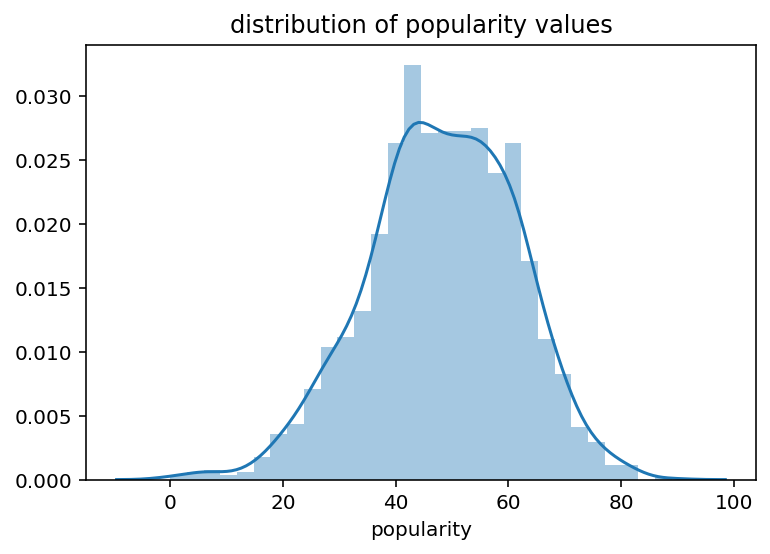

In [12]:
# normal distribution 
sns.distplot(hypo_df['popularity']).set_title('distribution of popularity values')

#### Bivariate Analysis

In [13]:
# separating artists by male and female
male_groups = hypo_df[hypo_df['gender'] == 'male']['popularity']
female_groups = hypo_df[hypo_df['gender'] == 'female']['popularity']

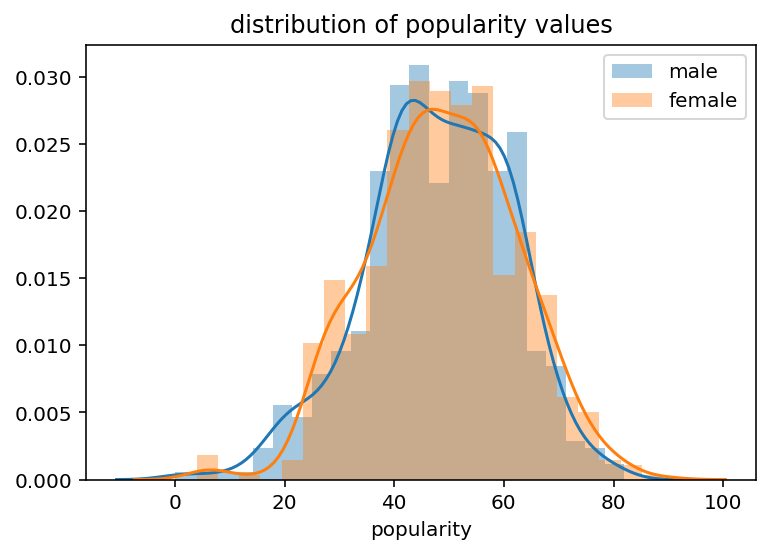

In [14]:
# plot comparision of male + female artists -> does not seem to vary that much
sns.distplot(male_groups, label = 'male').set_title('distribution of popularity values')
sns.distplot(female_groups, label = 'female')
plt.legend()
plt.show()

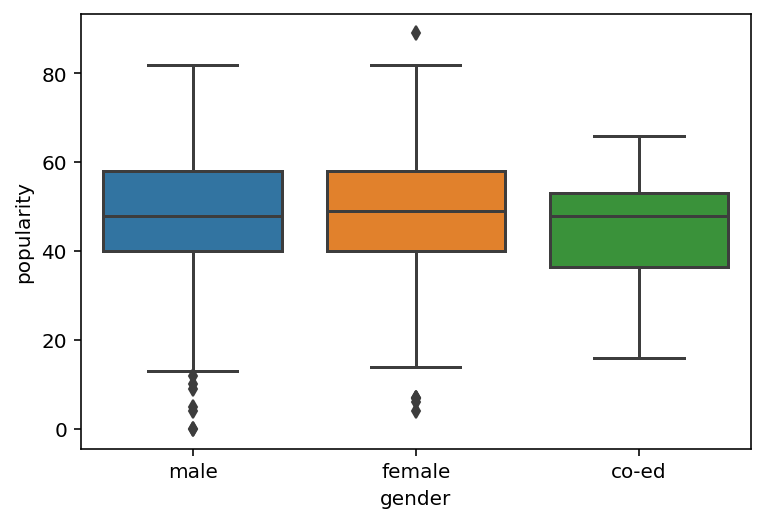

In [15]:
# more outliers w/ low popularity values for male artists 
# varied outliers for female artists
sns.boxplot(data=hypo_df, x='gender', y='popularity')

#### Interesting Aggregates

In [16]:
hypo_df.groupby('gender').agg(['mean', 'std', 'min', 'max'])

popularity                   
             mean        std min max
gender                              
co-ed   44.450000  12.882009  16  66
female  48.806993  13.367430   4  89
male    47.955394  13.216430   0  82

### Assessment of Missingness

In [17]:
print('Number Missing in Artists: ' + str(hypo_df['artists'].isna().sum()))
print('Number Missing in Popularity: ' + str(hypo_df['popularity'].isna().sum()))

Number Missing in Artists: 0
Number Missing in Popularity: 0


In [18]:
hypo_df.isna().sum()

artists       0
name          0
popularity    0
gender        0
dtype: int64

### Hypothesis Test

In [19]:
#getting all groups/artists whose genders purely male or female or in other words, co-ed groups are not included
mf_only = hypo_df[hypo_df['gender'] != 'co-ed']

In [20]:
# observed val
obs = abs(mf_only.groupby('gender').mean().diff().iloc[1][0])
print(obs)

0.851598816121637


In [21]:
# conducting hypothesis test
mean_diff = []

for x in range(10000):
    shuff_col = mf_only['popularity'].sample(replace=False, frac=1).reset_index(drop=True)
    
    shuffled = mf_only.assign(**{'popularity': shuff_col})
    
    gp_means = shuffled.groupby('gender').mean().loc[:, 'popularity']
    
    diff = abs(gp_means.diff().iloc[-1])
    
    mean_diff.append(diff)

In [22]:
print('P-Value: ' + str(np.mean(mean_diff >= obs)))

P-Value: 0.2027


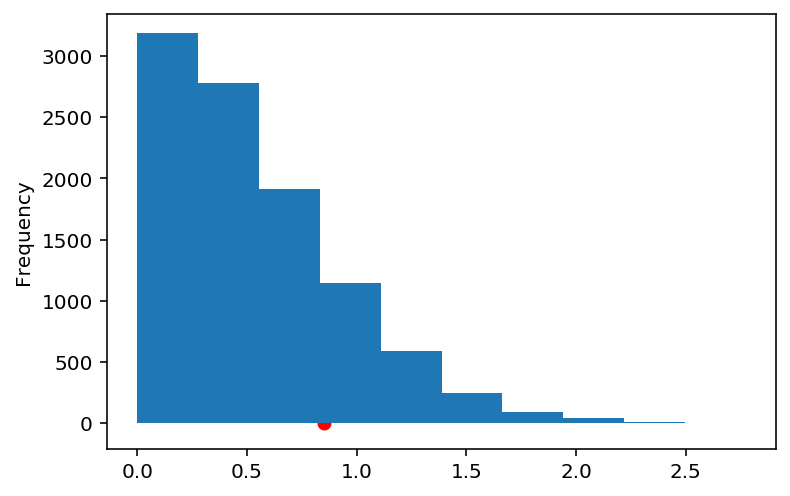

In [23]:
# fail to reject null 
mean_diff = pd.Series(mean_diff)
mean_diff.plot(kind='hist')
plt.scatter([obs], [0], color='r')

### Baseline Model

In [24]:
#imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split

In [25]:
# creating seperate df for models
mdl_df = df.drop(columns=['album', 'disc_number', 'explicit', 'external_ids', 
                 'external_urls', 'href', 'is_local', 'is_playable', 
                 'preview_url', 'track_number', 'type', 'uri',
                 'duration_ms.1', 'id', 'artist_uri'])
mdl_df['gender'] = mdl_df['artists'].apply(lambda x: gender_classification(x))
mdl_df = mdl_df[mdl_df['gender'] != 'co-ed']
mdl_df.head(5)

,artists,duration_ms,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,gender
0,EXO-SC,209253,1 Billion Views,71,0.735,0.727,0,-2.837,0,0.0364,0.3620,0.000000,0.0997,0.612,111.928,4,male
1,EXO-SC,195613,Telephone,61,0.817,0.640,5,-2.927,0,0.0487,0.2320,0.000000,0.2040,0.772,89.970,4,male
2,EXO-SC,203866,What a life,61,0.862,0.782,5,-3.811,0,0.1250,0.3010,0.000000,0.1430,0.847,135.029,4,male
3,EXO-SC,174720,On Me,61,0.693,0.866,6,-2.735,0,0.2290,0.0421,0.000002,0.2210,0.691,97.048,4,male
4,EXO-SC,206293,Nothin’,61,0.471,0.755,9,-1.215,1,0.0483,0.4390,0.000000,0.1040,0.178,166.134,5,male


In [26]:
# baseline model df
base_df = mdl_df.drop(columns=['name', 'energy', 'key', 'loudness', 
                               'mode', 'speechiness', 'acousticness', 
                               'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'])

In [27]:
base_df.isna().sum()

artists         0
duration_ms     0
popularity      0
danceability    0
gender          0
dtype: int64

In [28]:
base_df.head(5)

,artists,duration_ms,popularity,danceability,gender
0,EXO-SC,209253,71,0.735,male
1,EXO-SC,195613,61,0.817,male
2,EXO-SC,203866,61,0.862,male
3,EXO-SC,174720,61,0.693,male
4,EXO-SC,206293,61,0.471,male


In [29]:
#for train test split later on
X = base_df.drop(columns='popularity')
Y = base_df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [30]:
# baseline model pipeline w/ one-hot 
base_pl = Pipeline(steps=[
    ('one-hot', pp.OneHotEncoder(handle_unknown='ignore')), #for categorial columns 
    ('lin-reg', LinearRegression())
])

In [31]:
base_pl.fit(X_train, y_train)
preds = base_pl.predict(X_test)
print(preds[:5])

[56.70496738 57.99361506 57.0438927  45.92096021 41.57267942]


In [32]:
# evaluating baseline model by getting R^2 vals
base_r2s = []
base_rmses = []

for x in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    base_pl.fit(X_train, y_train)
    preds = base_pl.predict(X_test)

    rmse = np.sqrt(np.mean((preds - y_test)**2))
    base_rmses.append(rmse)

    r2 = base_pl.score(X_test, y_test)
    base_r2s.append(r2)

RMSE Mean: 8.59350522652325
Mean of R^2 Vals: 0.5772708326685752


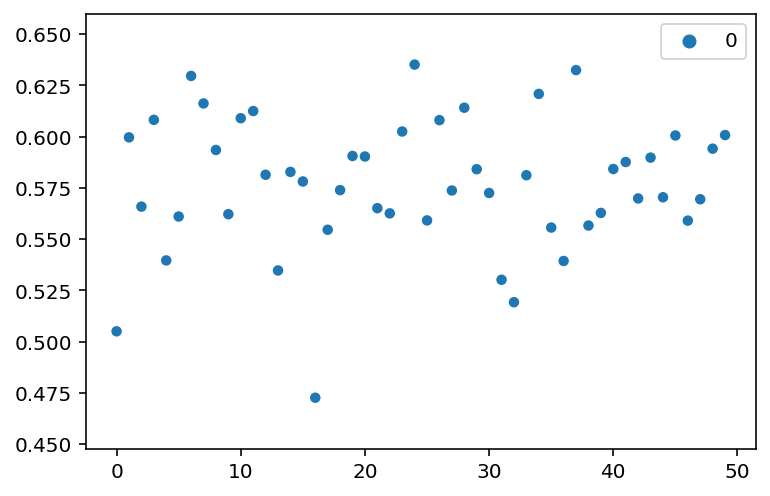

In [33]:
# low RMSE mean
base_df = pd.DataFrame(data=base_r2s)
sns.scatterplot(data=base_df)

print('RMSE Mean: ' + str(np.mean(base_rmses)))
print('Mean of R^2 Vals: ' + str(base_df.mean()[0])) # mean of scores/R^2 values from above

### Final Model

In [34]:
#imports
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Binarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [35]:
mdl_df.head(5)

,artists,duration_ms,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,gender
0,EXO-SC,209253,1 Billion Views,71,0.735,0.727,0,-2.837,0,0.0364,0.3620,0.000000,0.0997,0.612,111.928,4,male
1,EXO-SC,195613,Telephone,61,0.817,0.640,5,-2.927,0,0.0487,0.2320,0.000000,0.2040,0.772,89.970,4,male
2,EXO-SC,203866,What a life,61,0.862,0.782,5,-3.811,0,0.1250,0.3010,0.000000,0.1430,0.847,135.029,4,male
3,EXO-SC,174720,On Me,61,0.693,0.866,6,-2.735,0,0.2290,0.0421,0.000002,0.2210,0.691,97.048,4,male
4,EXO-SC,206293,Nothin’,61,0.471,0.755,9,-1.215,1,0.0483,0.4390,0.000000,0.1040,0.178,166.134,5,male


In [36]:
# creating df for use on final model
final_df = mdl_df.drop(columns=['name', 'key', 'loudness', 'mode', 
                       'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'time_signature'])
final_df.head(5)

,artists,duration_ms,popularity,danceability,energy,valence,tempo,gender
0,EXO-SC,209253,71,0.735,0.727,0.612,111.928,male
1,EXO-SC,195613,61,0.817,0.640,0.772,89.970,male
2,EXO-SC,203866,61,0.862,0.782,0.847,135.029,male
3,EXO-SC,174720,61,0.693,0.866,0.691,97.048,male
4,EXO-SC,206293,61,0.471,0.755,0.178,166.134,male


In [37]:
# for train test split
X = final_df.drop(columns='popularity')
Y = final_df['popularity']

In [38]:
# train test split for model selection
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

#### Model 1
Model 1 consists of a Binarizer transformer on the Danceability, Energy, and Valence columns at a threshold of 0.5. 

In [39]:
onehot_pl = Pipeline(steps=[
    ('one-hot', pp.OneHotEncoder(handle_unknown='ignore'))
])

binarizer_pl = Pipeline(steps=[
    ('binarizer', pp.Binarizer(threshold=0.50))
])

preproc1 = ColumnTransformer(transformers=[
    ('one-hot', onehot_pl, ['artists', 'gender']),
    ('binarizer', binarizer_pl, ['danceability', 'energy', 'valence'])
])

model_1 = Pipeline(steps=[
 ('preprocessor', preproc1),
 ('lin-reg', LinearRegression())
])

In [40]:
# average R^2
scores = cross_val_score(model_1, X_train, y_train, cv=5)
print(scores)
print('Scores Mean: ' + str(scores.mean()))

[0.70026348 0.71194393 0.70251694 0.63832287 0.56935748]
Scores Mean: 0.6644809396522764


#### Model 2
Model 2 improves upon Model 1 by getting the thresholds to the means of the columns instead of just 0.5.

In [41]:
dance_mean = final_df['danceability'].mean()
energy_mean = final_df['energy'].mean()
valence_mean = final_df['valence'].mean()

print('Danceability Mean: ' + str(dance_mean))
print('Energy Mean: ' + str(energy_mean))
print('Valence Mean: ' + str(valence_mean))

Danceability Mean: 0.6452829064919609
Energy Mean: 0.7353276950565811
Valence Mean: 0.5455309112567003


In [42]:
onehot_pl = Pipeline(steps=[
    ('one-hot', pp.OneHotEncoder(handle_unknown='ignore'))
])

dance_binarizer_pl = Pipeline(steps=[
    ('binarizer', pp.Binarizer(threshold=dance_mean))
])

energy_binarizer_pl = Pipeline(steps=[
    ('binarizer', pp.Binarizer(threshold=energy_mean))
])

valence_binarizer_pl = Pipeline(steps=[
    ('binarizer', pp.Binarizer(threshold=valence_mean))
])

preproc2 = ColumnTransformer(transformers=[
    ('one-hot', onehot_pl, ['artists', 'gender']),
    ('dance_binarizer', dance_binarizer_pl, ['danceability']),
    ('energy_binarizer', energy_binarizer_pl, ['energy']),
    ('valence_binarizer', valence_binarizer_pl, ['valence'])
])

model_2 = Pipeline(steps=[
 ('preprocessor', preproc2),
 ('lin-reg', LinearRegression())
])

In [43]:
# average R^2
scores = cross_val_score(model_2, X_train, y_train, cv=5)
print(scores)
print('Scores Mean: ' + str(scores.mean()))

[0.70219124 0.71273656 0.70851999 0.63889    0.57557754]
Scores Mean: 0.6675830656195392


#### Model 3 
Model 3 uses the previous Binarizer transformers and also uses a Function Transformer on the Duration_ms column to categorize a track as short, average, or long then one-hot encodes those values.

In [44]:
final_df.head(5)

,artists,duration_ms,popularity,danceability,energy,valence,tempo,gender
0,EXO-SC,209253,71,0.735,0.727,0.612,111.928,male
1,EXO-SC,195613,61,0.817,0.640,0.772,89.970,male
2,EXO-SC,203866,61,0.862,0.782,0.847,135.029,male
3,EXO-SC,174720,61,0.693,0.866,0.691,97.048,male
4,EXO-SC,206293,61,0.471,0.755,0.178,166.134,male


In [45]:
def duration_func(df):
    result = df.apply(lambda x: x.apply(
        lambda y: 'long' if y >= 240000 else ('average' if 240000 > y > 144000 else 'short')))
    
    return result

In [46]:
func_pl = Pipeline(steps=[
    ('func', pp.FunctionTransformer(func=duration_func, validate=False)),
    ('one-hot', pp.OneHotEncoder(handle_unknown='ignore'))
])

onehot_pl = Pipeline(steps=[
    ('one-hot', pp.OneHotEncoder(handle_unknown='ignore'))
])

dance_binarizer_pl = Pipeline(steps=[
    ('binarizer', pp.Binarizer(threshold=dance_mean))
])

energy_binarizer_pl = Pipeline(steps=[
    ('binarizer', pp.Binarizer(threshold=energy_mean))
])

valence_binarizer_pl = Pipeline(steps=[
    ('binarizer', pp.Binarizer(threshold=valence_mean))
])

preproc3 = ColumnTransformer(transformers=[
    ('func', func_pl, ['duration_ms']),
    ('one-hot', onehot_pl, ['artists', 'gender']),
    ('dance_binarizer', dance_binarizer_pl, ['danceability']),
    ('energy_binarizer', energy_binarizer_pl, ['energy']),
    ('valence_binarizer', valence_binarizer_pl, ['valence'])
])

model_3 = Pipeline(steps=[
    ('preprocessor', preproc3),
    ('lin-reg', LinearRegression())
])

In [47]:
scores = cross_val_score(model_3, X_train, y_train, cv=5)
print(scores)
print('Scores Mean: ' + str(scores.mean()))

[0.7078886  0.71744704 0.71163685 0.64069009 0.5694989 ]
Scores Mean: 0.669432293965895


#### Adjusting Parameters of Chosen Model

In [48]:
# imports
from sklearn.model_selection import GridSearchCV

In [49]:
# list of parameters
parameters = {
    'lin-reg__fit_intercept': [False, True],
    'lin-reg__normalize': [False, True],
    'lin-reg__copy_X': [False, True],
    'lin-reg__n_jobs': [5, 10, 15, 20, 25, 30],
}

In [50]:
model_3 = Pipeline(steps=[
    ('preprocessor', preproc3),
    ('lin-reg', LinearRegression())
])

In [51]:
clf = GridSearchCV(model_3, parameters, cv=5)

In [52]:
# best parameters for the final model
clf.fit(X_train, y_train)
clf.best_params_

{'lin-reg__copy_X': False,
 'lin-reg__fit_intercept': True,
 'lin-reg__n_jobs': 5,
 'lin-reg__normalize': False}

In [54]:
# model 4 as the model w/ the best parameters
model_4 = clf.best_estimator_

In [55]:
scores = cross_val_score(model_4, X_train, y_train, cv=5)
print(scores)
print('Scores Mean: ' + str(scores.mean()))

[0.7078886  0.71744704 0.71163685 0.64069009 0.5694989 ]
Scores Mean: 0.669432293965895


In [56]:
# setting the final model as model 4 
final_pl = model_4

In [57]:
final_r2s = []
final_rmses = []

for x in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    final_pl.fit(X_train, y_train)
    preds = final_pl.predict(X_test)

    rmse = np.sqrt(np.mean((preds - y_test)**2))
    final_rmses.append(rmse)

    r2 = final_pl.score(X_test, y_test)
    final_r2s.append(r2)

RMSE Mean: 7.444511783388301
Score Mean: 0.6843512134449881


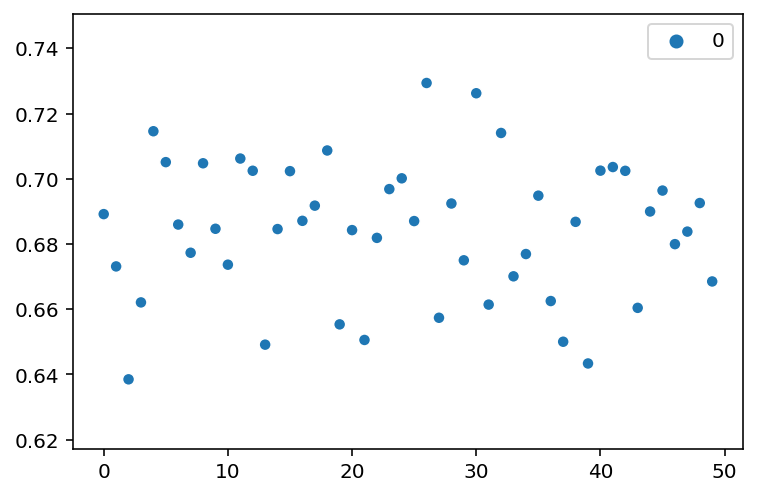

In [58]:
final_df = pd.DataFrame(data=final_r2s)
sns.scatterplot(data=final_df)
print('RMSE Mean: ' + str(np.mean(final_rmses)))
print('Score Mean: ' + str(final_df.mean()[0]))

### Fairness Evaluation

In [59]:
# making the evaluation dataset

fairness_df = mdl_df.drop(columns=['name', 'key', 'loudness', 'mode', 
                       'speechiness', 'acousticness', 'instrumentalness', 
                       'liveness', 'time_signature'])

##### Permutation Test

**Null Hypothesis:** My model is fair as the score/R^2 is roughly the same for both subsets.
<br>
**Alternative Hypothesis:** My model is unfair as the score/R^2 of the male subset differs compared to the female subset.
<br>
**Test Statistic:** Absolute difference in the score/R^2 values.

In [60]:
# splitting up data based on gender
males = fairness_df[fairness_df['gender'] == 'male']
females = fairness_df[fairness_df['gender'] == 'female']

##### Train-Test Split for Male Subset

In [61]:
# male train-test
males_X = males.drop(columns='popularity')
males_Y = males['popularity']
males_X_train, males_X_test, males_y_train, males_y_test = train_test_split(males_X, males_Y, test_size=0.25)

In [62]:
# calcuating male r^2
final_pl.fit(males_X_train, males_y_train)
final_pl.predict(males_X_test)
males_r2 = final_pl.score(males_X_test, males_y_test)

##### Train-Test Split for Female Subset

In [63]:
# female train-test
females_X = females.drop(columns='popularity')
females_Y = females['popularity']
females_X_train, females_X_test, females_y_train, females_y_test = train_test_split(females_X, females_Y, test_size=0.25)

In [64]:
# calcuating female r^2
final_pl.fit(females_X_train, females_y_train)
final_pl.predict(females_X_test)
females_r2 = final_pl.score(females_X_test, females_y_test)

In [65]:
# getting observed value for permutation test

print('Score/R^2 of Male Subset: ' + str(males_r2))
print('Score/R^2 of Female Subset: ' + str(females_r2))

obs = abs(males_r2 - females_r2)
print('Observed Value: ' + str(obs))

Score/R^2 of Male Subset: 0.725768062138586
Score/R^2 of Female Subset: 0.5467258609803978
Observed Value: 0.17904220115818825


In [66]:
# function for test
def score(df, pl):
    X = df.drop(columns='popularity')
    Y = df['popularity']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    
    pl.fit(X_train, y_train)
    pl.predict(X_test)
    score = pl.score(X_test, y_test)
    
    return score

In [67]:
# permutation test
score_diffs = []

for x in range(100):
    shuffled_col = fairness_df['gender'].sample(replace=False, frac=1).reset_index(drop=True)

    shuffled = fairness_df.assign(**{'gender': shuffled_col})

    males = shuffled[shuffled['gender'] == 'male']
    females = shuffled[shuffled['gender'] == 'female']
    
    male_score = score(males, final_pl)
    female_score = score(females, final_pl)

    diff_in_score = abs(male_score - female_score)

    score_diffs.append(diff_in_score)

P-Value: 0.1


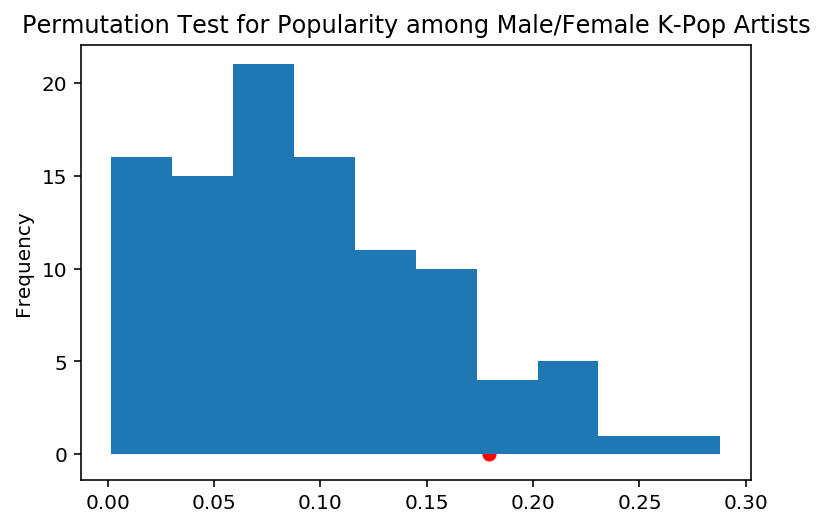

In [68]:
p_val = np.mean(score_diffs >= obs)
print('P-Value: ' + str(p_val))
pd.Series(score_diffs).plot(kind='hist', title='Permutation Test for Popularity among Male/Female K-Pop Artists')
plt.scatter(obs, 0, c='r');

In [69]:
# fail to reject null hypothesis
p_val > 0.05

True